## Divorce



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import math

import matplotlib.pyplot as plt
from matplotlib import pylab

from scipy.interpolate import interp1d
from scipy.misc import derivative

import thinkstats2
import thinkplot
from thinkstats2 import Cdf

import survival
import marriage

## Divorce

In [ ]:
%time nsfg_female = pd.read_hdf('FemMarriageData.hdf', 'FemMarriageData')

In [180]:
resp10 = marriage.ReadFemResp2017()
marriage.Validate2017(resp10)

resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)

resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)

resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)

resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)

married_resps = [resp[resp.evrmarry] for resp in [resp6, resp7, resp8, resp9, resp10]]

In [181]:
for df in married_resps:
    df['complete'] = df.divorced
    df['complete_var'] = df.mar1diss / 12
    df['ongoing_var'] = df.mar1diss / 12
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))
    
    # combine the 90s and 80s cohorts
    # df.loc[df.birth_index==90, 'birth_index'] = 80

/home/downey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/downey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/downey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

0 0
0 0
0 0
0 0
0 0


In [183]:
df = pd.concat(married_resps, ignore_index=True, sort=False)
len(df)

17095

In [184]:
complete = df.loc[df.complete, 'complete_var']
complete.describe()

count    5135.000000
mean        4.138526
std         4.185355
min         0.000000
25%         0.708333
50%         2.916667
75%         6.166667
max        26.750000
Name: complete_var, dtype: float64

In [185]:
ongoing = df.loc[~df.complete, 'complete_var']
ongoing.describe()

count    11960.000000
mean         7.169077
std          6.309525
min          0.000000
25%          1.500000
50%          5.750000
75%         11.583333
max         29.000000
Name: complete_var, dtype: float64

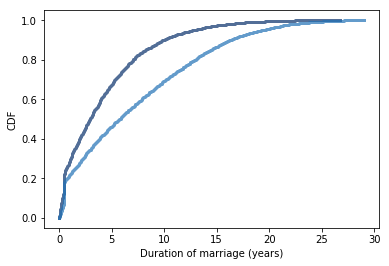

In [186]:
thinkplot.Cdf(thinkstats2.Cdf(complete))
thinkplot.Cdf(thinkstats2.Cdf(ongoing))
thinkplot.Config(xlabel='Duration of marriage (years)',
                 ylabel='CDF')

In [187]:
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	17095	50	45	0.0029
0.0833	17000	172	198	0.01
0.167	16630	169	183	0.01
0.25	16278	122	182	0.0075
0.333	15974	117	177	0.0073
0.417	15680	501	1381	0.032
0.5	13798	60	70	0.0043
0.583	13668	53	76	0.0039
0.667	13539	40	54	0.003
0.75	13445	53	60	0.0039
0.833	13332	49	67	0.0037
0.917	13216	59	90	0.0045
1	13067	75	58	0.0057
1.08	12934	54	75	0.0042
1.17	12805	54	62	0.0042
1.25	12689	62	65	0.0049
1.33	12562	52	63	0.0041
1.42	12447	41	70	0.0033
1.5	12336	40	49	0.0032
1.58	12247	48	63	0.0039
1.67	12136	46	74	0.0038
1.75	12016	46	55	0.0038
1.83	11915	53	52	0.0044
1.92	11810	38	63	0.0032
2	11709	57	77	0.0049
2.08	11575	41	80	0.0035
2.17	11454	35	70	0.0031
2.25	11349	40	69	0.0035
2.33	11240	49	86	0.0044
2.42	11105	54	64	0.0049
2.5	10987	37	66	0.0034
2.58	10884	43	69	0.004
2.67	10772	42	45	0.0039
2.75	10685	40	68	0.0037
2.83	10577	43	54	0.0041
2.92	10480	52	57	0.005
3	10371	44	72	0.0042
3.08	10255	48	58	0.0047
3.17	10149	34	73	0.0034
3.25	10042	45	55	0.0045
3.33	9942	46	63	0.0046
3.42	9833	31	65	0.00

In [188]:
hf, sf = marriage.EstimateSurvival(df)

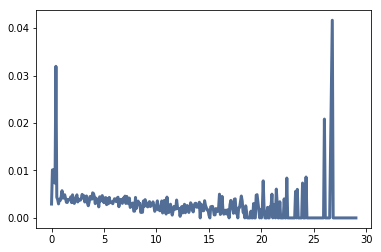

In [189]:
thinkplot.Plot(hf)

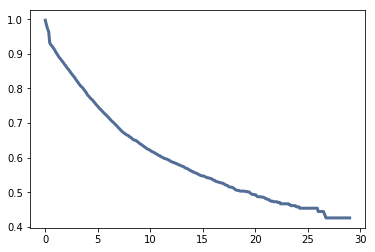

In [190]:
thinkplot.Plot(sf)

In [192]:
#from lifelines import KaplanMeierFitter

#kmf = KaplanMeierFitter()
#kmf.fit(df.complete_var, event_observed=df.complete)
#kmf.survival_function_.plot(color='red')
#thinkplot.Config(xlim=[0, 30])

In [193]:
colors = sns.color_palette("colorblind", 5)
cohorts = [80, 70, 60, 50, 90]
colormap = dict(zip(cohorts, colors))

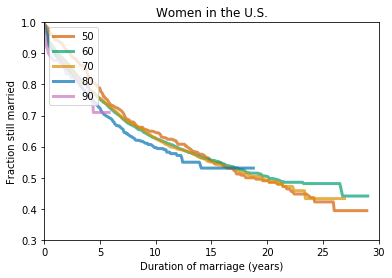

In [194]:
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    hf, sf = marriage.EstimateSurvival(group)
    thinkplot.Plot(sf, label=name, color=colormap[name])

thinkplot.Config(title='Women in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1])

In [195]:
last = grouped.get_group(80)
complete = last[last.complete].complete_var
ongoing = last[~last.complete].ongoing_var
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	4208	9	17	0.0021
0.0833	4182	48	76	0.011
0.167	4058	56	92	0.014
0.25	3910	35	98	0.009
0.333	3777	38	92	0.01
0.417	3647	116	576	0.032
0.5	2955	13	33	0.0044
0.583	2909	11	36	0.0038
0.667	2862	10	30	0.0035
0.75	2822	11	29	0.0039
0.833	2782	9	27	0.0032
0.917	2746	18	37	0.0066
1	2691	19	28	0.0071
1.08	2644	11	34	0.0042
1.17	2599	9	31	0.0035
1.25	2559	11	35	0.0043
1.33	2513	8	30	0.0032
1.42	2475	10	29	0.004
1.5	2436	9	24	0.0037
1.58	2403	12	34	0.005
1.67	2357	12	40	0.0051
1.75	2305	10	26	0.0043
1.83	2269	11	16	0.0048
1.92	2242	6	29	0.0027
2	2207	11	33	0.005
2.08	2163	7	32	0.0032
2.17	2124	7	30	0.0033
2.25	2087	6	30	0.0029
2.33	2051	10	43	0.0049
2.42	1998	9	25	0.0045
2.5	1964	7	24	0.0036
2.58	1933	9	34	0.0047
2.67	1890	10	20	0.0053
2.75	1860	7	31	0.0038
2.83	1822	8	20	0.0044
2.92	1794	8	28	0.0045
3	1758	6	34	0.0034
3.08	1718	11	21	0.0064
3.17	1686	5	31	0.003
3.25	1650	11	28	0.0067
3.33	1611	12	24	0.0074
3.42	1575	7	26	0.0044
3.5	1542	8	22	0.0052
3.58	1512	4	26	0.0026
3.67	1482	9	30	0.0061
3

So far:

1. Doesn't take into account sampling weights.

2. Doesn't take into account `agemarry`.

3. Vulnerable to small errors in tail.

In [196]:

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=101)

CPU times: user 6.19 s, sys: 7.9 ms, total: 6.19 s
Wall time: 6.19 s


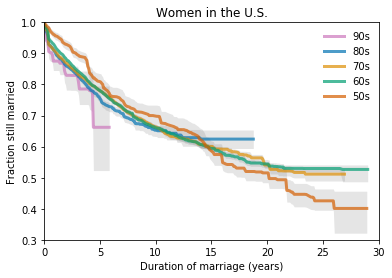

In [197]:

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

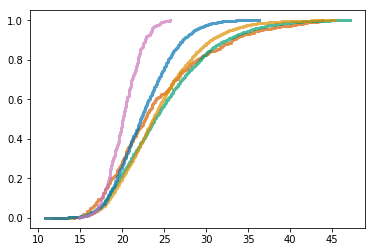

In [198]:
for name, group in iter(grouped):
    cdf = thinkstats2.Cdf(group.agemarry)
    thinkplot.Cdf(cdf, label=name, color=colormap[name])

/home/downey/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/home/downey/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/downey/MarriageNSFG/marriage.py:113: RuntimeWarning: invalid value encountered in less
  return np.random.choice(group.index, 1, p=weights)[0]


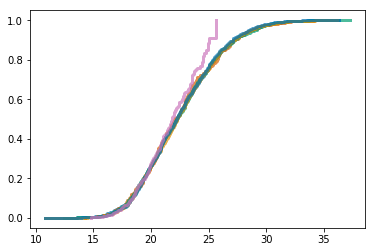

In [199]:
name = 80
last = grouped.get_group(name)
thinkplot.Cdf(thinkstats2.Cdf(last.agemarry), label=name, color=colormap[name])

for name, group in iter(grouped):
    if name != '80':
        matched = marriage.PropensityMatch(last, group, colname='agemarry')
        thinkplot.Cdf(thinkstats2.Cdf(matched.agemarry), label=name, color=colormap[name])

In [ ]:

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, prop_match=80)

In [ ]:

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, error_rate=0.1)

In [ ]:

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, prop_match=80)

In [ ]:

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [ ]:
def MakePercentageTable(sf_map, ages=[6, 16, 26]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

# Male respondents

In [ ]:

male2010 = marriage.ReadMaleResp2010()
male2010.head()

In [ ]:
male2013 = marriage.ReadMaleResp2013()
male2013.head()

In [ ]:
male2015 = marriage.ReadMaleResp2015()
male2015.head()

In [ ]:
males = [male2010, male2013, male2015]
df2 = pd.concat(males, ignore_index=True)
len(df2)

In [ ]:
married_males = [resp[resp.evrmarry] for resp in [male2010, male2013, male2015]]

In [ ]:
for df in married_males:
    df['complete'] = df.divorced
    df['complete_var'] = df.mar1diss / 12
    df['ongoing_var'] = df.mar1diss / 12
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))
    
    # combine the 90s and 80s cohorts
    # df.loc[df.birth_index==90, 'birth_index'] = 80

In [ ]:
df = pd.concat(married_males, ignore_index=True)
len(df)

In [ ]:
complete = df.loc[df.complete, 'complete_var']
complete.describe()

In [ ]:
ongoing = df.loc[~df.complete, 'complete_var']
ongoing.describe()

In [ ]:
thinkplot.Cdf(thinkstats2.Cdf(complete))
thinkplot.Cdf(thinkstats2.Cdf(ongoing))
thinkplot.Config(xlabel='Duration of marriage (years)',
                 ylabel='CDF')

In [ ]:
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

In [ ]:
hf, sf = marriage.EstimateSurvival(df)

In [ ]:
thinkplot.Plot(hf)

In [ ]:
thinkplot.Plot(sf)

In [ ]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
kmf.fit(df.complete_var, event_observed=df.complete)
kmf.survival_function_.plot(color='red')
thinkplot.Config(xlim=[0, 30])

In [ ]:
colors = sns.color_palette("colorblind", 5)
cohorts = [80, 70, 60, 50, 90]
colormap = dict(zip(cohorts, colors))

In [ ]:
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    hf, sf = marriage.EstimateSurvival(group)
    thinkplot.Plot(sf, label=name, color=colormap[name])

thinkplot.Config(title='Women in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1])

In [ ]:
last = grouped.get_group(80)
complete = last[last.complete].complete_var
ongoing = last[~last.complete].ongoing_var
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

So far:

1. Doesn't take into account sampling weights.

2. Doesn't take into account `agemarry`.

3. Vulnerable to small errors in tail.

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=101)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Men in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
for name, group in iter(grouped):
    cdf = thinkstats2.Cdf(group.agemarry)
    thinkplot.Cdf(cdf, label=name, color=colormap[name])

In [ ]:
name = 80
last = grouped.get_group(name)
thinkplot.Cdf(thinkstats2.Cdf(last.agemarry), label=name, color=colormap[name])

for name, group in iter(grouped):
    if name != '80':
        matched = marriage.PropensityMatch(last, group, colname='agemarry')
        thinkplot.Cdf(thinkstats2.Cdf(matched.agemarry), label=name, color=colormap[name])

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, prop_match=80)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Men in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, error_rate=0.1)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Men in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, prop_match=80)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Men in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [ ]:
def MakePercentageTable(sf_map, ages=[6, 16, 26]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

## All adults


In [ ]:
resps = [resp6, resp7, resp8, resp9, male2010, male2013, male2015]

In [ ]:
married_resps = [resp[resp.evrmarry] for resp in resps]

In [ ]:
for df in married_resps:
    df['complete'] = df.divorced
    df['complete_var'] = df.mar1diss / 12
    df['ongoing_var'] = df.mar1diss / 12
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(len(df), sum(df.complete_missing), sum(df.ongoing_missing))
    
    # combine the 90s and 80s cohorts
    # df.loc[df.birth_index==90, 'birth_index'] = 80

In [ ]:
df = pd.concat(married_resps, ignore_index=True)
len(df)

In [ ]:
complete = df.loc[df.complete, 'complete_var']
complete.describe()

In [ ]:
ongoing = df.loc[~df.complete, 'complete_var']
ongoing.describe()

In [ ]:
thinkplot.Cdf(thinkstats2.Cdf(complete))
thinkplot.Cdf(thinkstats2.Cdf(ongoing))
thinkplot.Config(xlabel='Duration of marriage (years)',
                 ylabel='CDF')

In [ ]:
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

In [ ]:
hf, sf = marriage.EstimateSurvival(df)

In [ ]:
thinkplot.Plot(hf)

In [ ]:
thinkplot.Plot(sf)

In [ ]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
kmf.fit(df.complete_var, event_observed=df.complete)
kmf.survival_function_.plot(color='red')
thinkplot.Config(xlim=[0, 30])

In [ ]:
colors = sns.color_palette("colorblind", 5)
cohorts = [80, 70, 60, 50, 90]
colormap = dict(zip(cohorts, colors))

In [ ]:
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    hf, sf = marriage.EstimateSurvival(group)
    thinkplot.Plot(sf, label=name, color=colormap[name])

thinkplot.Config(title='Adults in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1])

In [ ]:
last = grouped.get_group(80)
complete = last[last.complete].complete_var
ongoing = last[~last.complete].ongoing_var
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

So far:

1. Doesn't take into account sampling weights.

2. Doesn't take into account `agemarry`.

3. Vulnerable to small errors in tail.

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=101)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Adults in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [ ]:
for name, group in iter(grouped):
    cdf = thinkstats2.Cdf(group.agemarry)
    thinkplot.Cdf(cdf, label=name, color=colormap[name])

In [ ]:
name = 80
last = grouped.get_group(name)
thinkplot.Cdf(thinkstats2.Cdf(last.agemarry), label=name, color=colormap[name])

for name, group in iter(grouped):
    if name != '80':
        matched = marriage.PropensityMatch(last, group, colname='agemarry')
        thinkplot.Cdf(thinkstats2.Cdf(matched.agemarry), label=name, color=colormap[name])

In [ ]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=101, prop_match=80)

In [ ]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Adults in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1],
                 legend=True, loc='upper right', frameon=False)

thinkplot.Save('divorce1', clf=False, formats=['png'])

In [ ]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [ ]:
def MakePercentageTable(sf_map, ages=[7, 16, 26]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

In [ ]:
group = grouped.get_group(80)

In [ ]:
thinkplot.Cdf(thinkstats2.Cdf(group.agemarry))

In [ ]:
group.agemarry.describe()

In [ ]:
youngmarry = group[group.agemarry <= 21]
oldmarry = group[group.agemarry > 21]

In [ ]:
len(youngmarry), len(oldmarry)

In [ ]:
hf, sf = marriage.EstimateSurvival(youngmarry)
thinkplot.Plot(sf, label='Married age <= 21')
hf, sf = marriage.EstimateSurvival(oldmarry)
thinkplot.Plot(sf, label='Married age > 21')
thinkplot.Config(title='Adults in the U.S., born in 1990s',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 20], ylim=[0.3, 1],
                 legend=True, loc='upper right', frameon=False)